# Human Body Posture Recognition based on inclination

In [1]:
import cv2
import os
import mediapipe as mp
import pandas as pd
import numpy as np
import csv

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2023-12-06 21:14:23.417987: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

# Initializing MediaPipe Pose
mp_pose = mp.solutions.pose

# Function for detecting and returning human body posture
def detect_human_posture(frame):
    # Converting frame to RGB as MediaPipe requires RGB input
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Using MediaPipe Pose to detect human bodies
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        results = pose.process(frame_rgb)

        if results.pose_landmarks:
            # Calculating posture based on landmarks
            posture = analyze_posture(results.pose_landmarks.landmark)
        else:
            posture = "No human detected"

    return posture

# Function to analyze body landmarks to determine posture
def analyze_posture(landmarks):
    left_shoulder_y = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y
    left_hip_y = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y
    left_knee_y = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y

    if left_shoulder_y > left_hip_y:
        if left_shoulder_y > left_knee_y:
            posture = "Bent Over"
        else:
            posture = "Almost Lied Down"
    else:
        if left_shoulder_y < left_knee_y:
            
            posture = "Standing Straight"
        else:
            posture = "Not Straight"

    return posture

# Function for detecting human bodies using the HOG Detector
def detect_human_hog(frame):
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    bodies, _ = hog.detectMultiScale(frame, winStride=(8, 8))
    for (x, y, w, h) in bodies:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return frame

# Function for detecting human bodies using Haar Cascades
def detect_human_haar(frame):
    body_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')
    bodies = body_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=5)
    for (x, y, w, h) in bodies:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    return frame

# Function for process images in sequence from a folder
def process_images_in_sequence(folder_path, model_choice):
    # Checking if the folder exists
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} does not exist.")
        return

    # Creating a list for storing posture results
    posture_results = []

    # Looping through image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        frame = cv2.imread(image_path)

        if frame is not None:
            if model_choice == '1':
                frame = detect_human_hog(frame)  # HOG Detector
            elif model_choice == '2':
                frame = detect_human_haar(frame)  # Haar Cascades

            posture = detect_human_posture(frame)
            posture_results.append((image_file, posture))

            print(f"Image: {image_file}, Posture: {posture}")
        else:
            print(f"Failed to read image: {image_file}")

    # Saving results to a CSV file
    csv_dir = "./Results"  
    if not os.path.exists(csv_dir):
        os.makedirs(csv_dir)

    save_to_csv(model_choice, posture_results, csv_dir)

# Function to save posture results to a CSV file
def save_to_csv(model_choice, posture_results, csv_dir):
    # Creating a CSV file for the model choice
    csv_file = os.path.join(csv_dir, f"body_posture_model_{model_choice}.csv")

    # Writing results to the CSV file
    with open(csv_file, 'w') as file:
        file.write("Image, Posture\n")
        for image, posture in posture_results:
            file.write(f"{image}, {posture}\n")

if __name__ == "__main__":
    # for Selecting the recognition model
    print("Select the Recognition Model:")
    print("1. HOG Detector")
    print("2. HAAR Cascades")

    model_choice = input("Enter your choice (1/2): \n")

    if model_choice not in ['1', '2']:
        print("Invalid choice. Please select 1 or 2 for the model.")
    else:
        # for Selecting the source (camera, dataset)
        print("Choose an option:")
        print("Option-1: Live Camera")
        print("Option-2: Input Dataset")

        option = input("Enter your choice (1/2): \n ")

        if option == '1':
            # Placeholder for processing live camera feed if needed
            print("Live camera processing is not implemented yet.")
        elif option == '2':
            folder_path = "./Dataset"  # Providing input dataset path of image data folder
            process_images_in_sequence(folder_path, model_choice)
        else:
            print("Invalid choice. Please select either Option-1 or Option-2.")

Select the Recognition Model:
1. HOG Detector
2. HAAR Cascades


Enter your choice (1/2): 
 1


Choose an option:
Option-1: Live Camera
Option-2: Input Dataset


Enter your choice (1/2): 
  2


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Image: pose369.jpg, Posture: Standing Straight
Image: pose433.jpg, Posture: Standing Straight
Image: pose355.jpg, Posture: Standing Straight
Image: pose341.jpg, Posture: Standing Straight
Image: pose88.jpg, Posture: Bent Over
Image: pose427.jpg, Posture: Standing Straight
Image: pose63.jpg, Posture: Standing Straight
Image: pose77.jpg, Posture: Almost Lied Down
Image: pose396.jpg, Posture: Bent Over
Image: pose382.jpg, Posture: Standing Straight
Image: pose619.jpg, Posture: Standing Straight
Image: pose157.jpg, Posture: Standing Straight
Image: pose631.jpg, Posture: Standing Straight
Image: pose625.jpg, Posture: Standing Straight
Image: pose143.jpg, Posture: Standing Straight
Image: pose1161.jpg, Posture: Bent Over
Image: pose816.jpg, Posture: Standing Straight
Image: pose1175.jpg, Posture: Standing Straight
Image: pose802.jpg, Posture: Standing Straight
Image: pose194.jpg, Posture: Standing Straight
Image: pose1149.jpg, Posture: Bent Over
Image: pose180.jpg, Posture: Standing Straight

In [10]:
# Code for Accuracy Evaluation

import os
import csv

def evaluate_accuracy(model_choice, csv_dir):
    # Loading ground truth from CSV file
    ground_truth_path = os.path.join(csv_dir, "ground_truth.csv")
    ground_truth = {}

    with open(ground_truth_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skipping header
        for row in reader:
            image, actual_posture = row
            ground_truth[image] = actual_posture

    # Loading predicted posture from model's CSV file
    predicted_path = os.path.join(csv_dir, f"body_posture_model_{model_choice}.csv")
    predicted_posture = {}

    with open(predicted_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skipping header
        for row in reader:
            image, predicted = row
            predicted_posture[image] = predicted

    # Evaluating accuracy
    correct_predictions = 0
    total_images = len(ground_truth)

    for image, actual_posture in ground_truth.items():
        if image in predicted_posture:
            predicted = predicted_posture[image]
            if actual_posture == predicted:
                correct_predictions += 1

    accuracy = (correct_predictions / total_images) * 100

    print(f"Model: {model_choice}")
    print(f"Total Images: {total_images}")
    print(f"Correct Predictions: {correct_predictions}")
    print(f"Accuracy: {accuracy:.2f}%")

if __name__ == "__main__":
    # Select the recognition model
    print("Select the recognition model:")
    print("1. HOG Detector")
    print("2. HAAR Cascades")

    model_choice = input("Enter your choice (1/2): ")

    if model_choice not in ['1', '2']:
        print("Invalid choice. Please select 1 or 2 for the model.")
    else:
        # Directory for saving the ground truth CSV file
        csv_dir = "./Results"

        # Assuming that we have a ground truth CSV file with actual postures
        # Format: Image, Actual Posture

        # Now, evaluate accuracy
        evaluate_accuracy(model_choice, csv_dir)


Select the recognition model:
1. HOG Detector
2. HAAR Cascades


Enter your choice (1/2):  1


Model: 1
Total Images: 1283
Correct Predictions: 1257
Accuracy: 97.97%


Model 1 Results:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98

Model 2 Results:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00



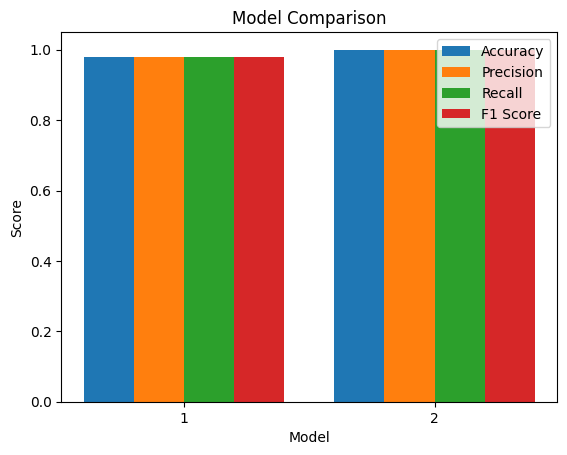

In [11]:
# Code for Model Comparison

import os
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def plot_model_comparison(results_dict):
    models = list(results_dict.keys())
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    bar_width = 0.2  # To adjust the width of the bars
    index = np.arange(len(models))

    for i, metric in enumerate(metrics):
        values = [results[metric] for results in results_dict.values()]
        plt.bar(index + i * bar_width, values, bar_width, label=metric)

    plt.xlabel('Model [')
    plt.ylabel('Score')
    plt.title('Model Comparison')
    plt.xticks(index + bar_width * (len(metrics) - 1) / 2, models)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # list of model choices for comparison
    model_choices = ['1', '2']  

    results_dict = {}

    for model_choice in model_choices:
        # Loading ground truth from a CSV file
        ground_truth_csv_path = "./Results/ground_truth.csv"  
        ground_truth = load_ground_truth(ground_truth_csv_path)

        # Loading predicted results from the CSV files generated by the main code
        predicted_csv_path = f"./Results/body_posture_model_{model_choice}.csv"
        predicted_results = []
        with open(predicted_csv_path, 'r') as file:
            reader = csv.reader(file)
            next(reader)  # Skip header
            for row in reader:
                image_name, posture = row
                predicted_results.append((image_name, posture))

        # Evaluating performance
        accuracy = accuracy_score([ground_truth[image] for image, _ in predicted_results],
                                   [posture for _, posture in predicted_results])

        precision = precision_score([ground_truth[image] for image, _ in predicted_results],
                                    [posture for _, posture in predicted_results], average='weighted')

        recall = recall_score([ground_truth[image] for image, _ in predicted_results],
                              [posture for _, posture in predicted_results], average='weighted')

        f1 = f1_score([ground_truth[image] for image, _ in predicted_results],
                      [posture for _, posture in predicted_results], average='weighted')

        results_dict[model_choice] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }

    # Printing results
    for model_choice, results in results_dict.items():
        print(f"Model {model_choice} Results:")
        for metric, value in results.items():
            print(f"{metric}: {value:.2f}")
        print()

    # Plot model comparison
    plot_model_comparison(results_dict)


Select the recognition model:
1. HOG Detector
2. HAAR Cascades


Enter your choice (1/2): 
 1


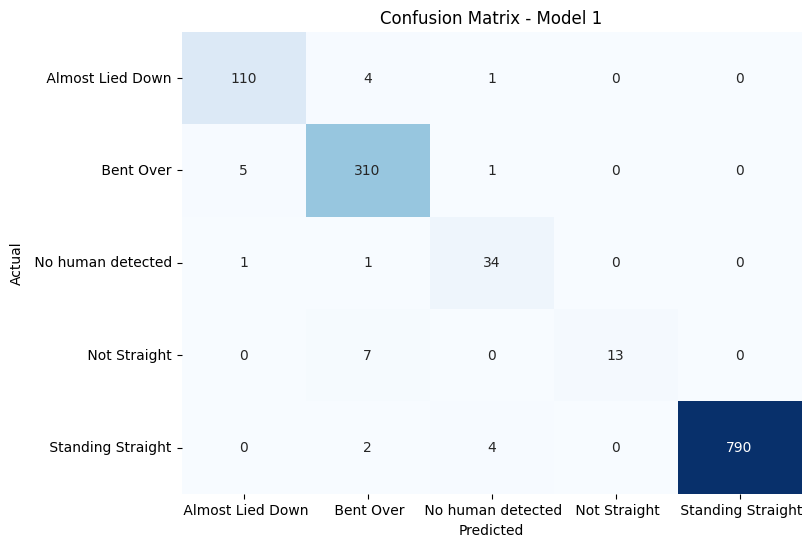

In [4]:
# Code for plotting Confusion matrix

import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to load ground truth from a CSV file
def load_ground_truth(csv_path):
    ground_truth = {}
    with open(csv_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            image_name, posture = row
            ground_truth[image_name] = posture
    return ground_truth

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    # Creating DataFrame from the confusion matrix for better visualization using seaborn
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

if __name__ == "__main__":
    # Select the recognition model
    print("Select the recognition model:")
    print("1. HOG Detector")
    print("2. HAAR Cascades")

    model_choice = input("Enter your choice (1/2): \n")

    if model_choice not in ['1', '2']:
        print("Invalid choice. Please select 1 or 2 for the model.")
    else:
        # Loading ground truth from a CSV file
        ground_truth_csv_path = "./Results/ground_truth.csv"  
        ground_truth = load_ground_truth(ground_truth_csv_path)

        # Loading predicted results from the CSV files generated by the main code
        predicted_csv_path = f"./Results/body_posture_model_{model_choice}.csv"
        predicted_results = []
        with open(predicted_csv_path, 'r') as file:
            reader = csv.reader(file)
            next(reader)  # Skip header
            for row in reader:
                image_name, posture = row
                predicted_results.append((image_name, posture))

        # Creating lists for ground truth and predicted labels
        y_true = [ground_truth[image] for image, _ in predicted_results]
        y_pred = [posture for _, posture in predicted_results]

        # Plotting confusion matrix
        classes = sorted(set(y_true + y_pred))
        plot_confusion_matrix(y_true, y_pred, classes, f'Model {model_choice}')


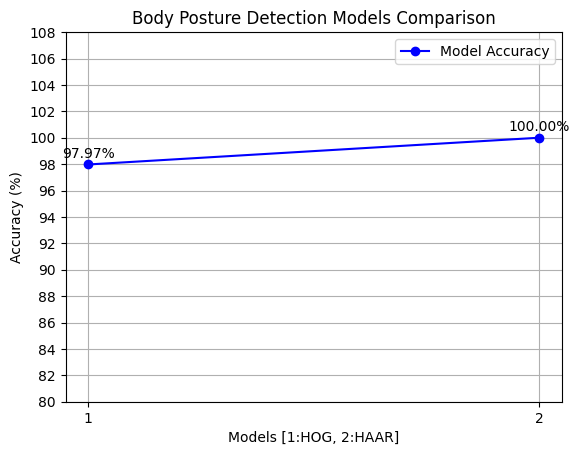

In [8]:
# Code for Body Posture Detection Models Comparison

import os
import csv
import matplotlib.pyplot as plt
import numpy as np  

def evaluate_accuracy(model_choice, csv_dir):
    # Loading ground truth from CSV file
    ground_truth_path = os.path.join(csv_dir, "ground_truth.csv")
    ground_truth = {}

    with open(ground_truth_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            image, actual_posture = row
            ground_truth[image] = actual_posture

    # Loading predicted posture from model's CSV file
    predicted_path = os.path.join(csv_dir, f"body_posture_model_{model_choice}.csv")
    predicted_posture = {}

    with open(predicted_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            image, predicted = row
            predicted_posture[image] = predicted

    # Evaluating accuracy
    correct_predictions = 0
    total_images = len(ground_truth)

    for image, actual_posture in ground_truth.items():
        if image in predicted_posture:
            predicted = predicted_posture[image]
            if actual_posture == predicted:
                correct_predictions += 1

    accuracy = (correct_predictions / total_images) * 100

    return accuracy

if __name__ == "__main__":
    model_choices = ['1', '2']  
    accuracies = []

    # Directory to save the ground truth CSV file
    csv_dir = "./Results"

    # Plotting as a line connecting points for each model
    for model_choice in model_choices:
        accuracy = evaluate_accuracy(model_choice, csv_dir)
        accuracies.append(accuracy)

    # Set y-axis ticks to intervals of 5
    y_ticks = np.arange(80, 110, 2)

    plt.plot(model_choices, accuracies, marker='o', label='Model Accuracy', linestyle='-', color='b')

    # Adding labels to data points
    for i, txt in enumerate(accuracies):
        plt.annotate(f'{txt:.2f}%', (model_choices[i], accuracies[i]), textcoords="offset points", xytext=(0,5), ha='center')

    plt.xlabel('Models [1:HOG, 2:HAAR]')
    plt.ylabel('Accuracy (%)')
    plt.title('Body Posture Detection Models Comparison')
    plt.ylim(80, 100)  # Set y-axis limits 
    plt.yticks(y_ticks)  # Set y-axis ticks
    plt.legend()
    plt.grid(True)
    plt.show()
